## boston

In [1]:
from src import Config, CNNModelRegressor
from src.model_matirx import Config, CNNModelMatrix
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('data/housing.csv', header=None, sep='\s+') 
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
x = StandardScaler().fit_transform(x)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

cfg = Config()
cnn = CNNModelRegressor(cfg, train_x, train_y)

In [2]:
plot_data = {}
names = ['caputo', 'anti_caputo', 'non_caputo']
for n in names:
    plot_data[n] = {}
    for i in range(1, 10):
        plot_data[n][i] = {}
        cnn.load('boston/{}_{}.npz'.format(n, i))
        print('type: {} alpha: {} / 9'.format(n, i))
        print('=' * 20)
        print('train r2: ', r2_score(train_y, cnn.predict(train_x)))
        print('test r2: ', r2_score(test_y, cnn.predict(test_x)))
        plot_data[n][i]['train'] = r2_score(train_y, cnn.predict(train_x))
        plot_data[n][i]['test'] = r2_score(test_y, cnn.predict(test_x))
        print('-' * 20, '\n')

type: caputo alpha: 1 / 9
train r2:  0.9151097696421949
test r2:  0.8317456513124953
-------------------- 

type: caputo alpha: 2 / 9
train r2:  0.9141246064294464
test r2:  0.8311931144338238
-------------------- 

type: caputo alpha: 3 / 9
train r2:  0.9162341052933295
test r2:  0.8324952795608606
-------------------- 

type: caputo alpha: 4 / 9
train r2:  0.9185936184286199
test r2:  0.8348470665491015
-------------------- 

type: caputo alpha: 5 / 9
train r2:  0.919702099946177
test r2:  0.835984427037527
-------------------- 

type: caputo alpha: 6 / 9
train r2:  0.9208459383148527
test r2:  0.8375267799831605
-------------------- 

type: caputo alpha: 7 / 9
train r2:  0.9209654050357537
test r2:  0.8373404424058463
-------------------- 

type: caputo alpha: 8 / 9
train r2:  0.9163858980285668
test r2:  0.8325931787678563
-------------------- 

type: caputo alpha: 9 / 9
train r2:  0.9183408565011955
test r2:  0.8351352592551403
-------------------- 

type: anti_caputo alpha: 1 / 9

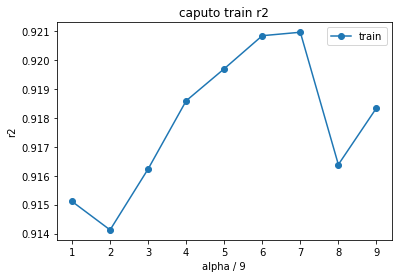

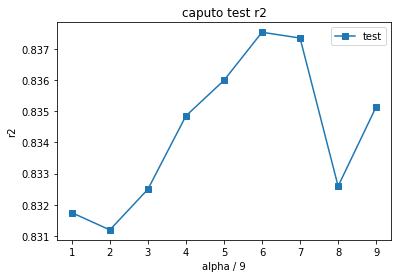

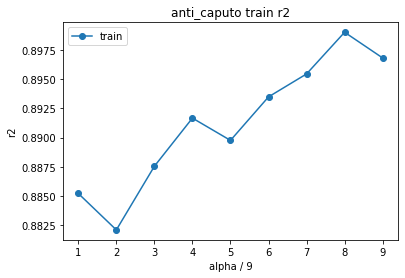

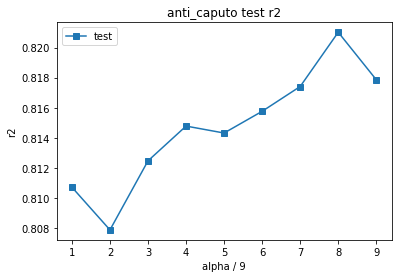

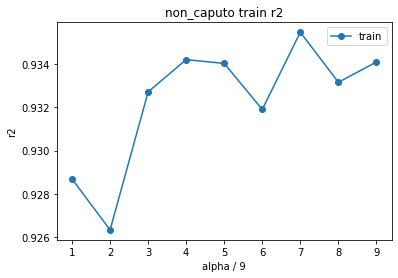

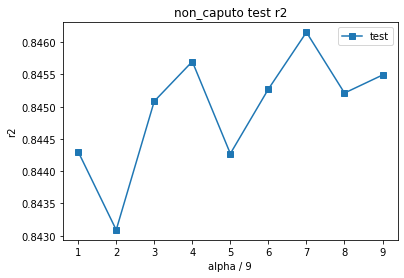

In [3]:
# type不变，r2关于alpha的变化
def plot_type(froze_type):
    data = plot_data[froze_type]
    idxs = range(1, 10)
    train = [data[i]['train'] for i in idxs]
    test = [data[i]['test'] for i in idxs]
    plt.plot(idxs, train, marker='o', label='train')
    plt.title('{} train r2'.format(froze_type))
    plt.xlabel('alpha / 9')
    plt.ylabel('r2')
    plt.legend()
    plt.show()

    plt.plot(idxs, test, marker='s', label='test')
    plt.title('{} test r2'.format(froze_type))
    plt.xlabel('alpha / 9')
    plt.ylabel('r2')
    plt.legend()
    plt.show()

for n in names:
    plot_type(n)



## mnist

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from src.classifier import CNNModelClassifier, Config
from sklearn.metrics import accuracy_score, classification_report


oe = OneHotEncoder()
df = pd.read_csv('data/mnist_test.csv')
label = oe.fit_transform(df['label'].values.reshape(-1, 1))
label = label.toarray()
# x = df.iloc[:, 1:].values
x = df.iloc[:, 1:].values / 255
y = label

oe = OneHotEncoder()
train = pd.read_csv('data/mnist_train.csv')
train_label = oe.fit_transform(train['label'].values.reshape(-1, 1))
train_label = train_label.toarray()
# x = df.iloc[:, 1:].values
train_x = train.iloc[:, 1:].values / 255
train_y = train_label

In [5]:
cfg = Config()
cnn = CNNModelClassifier(cfg, train_x, train_y)

In [6]:
plot_data = {}
names = ['caputo', 'anti_caputo', 'non_caputo']
nodes = [50, 100, 150, 200]
for n in names:
    plot_data[n] = {}
    for i in nodes:
        plot_data[n][i] = {}
        cnn.load('mnist/{}_{}.npz'.format(n, i))
        print('type: {} size: {}'.format(n, i))
        print('=' * 20)
        print('train')
        print(classification_report(train_y.argmax(axis=1),cnn.predict(train_x).argmax(axis=1)))
        print('test')
        print(classification_report(y.argmax(axis=1),cnn.predict(x).argmax(axis=1)))
        plot_data[n][i]['train'] = accuracy_score(train_y.argmax(axis=1),cnn.predict(train_x).argmax(axis=1))
        plot_data[n][i]['test'] = accuracy_score(y.argmax(axis=1),cnn.predict(x).argmax(axis=1))
        print('-' * 20, '\n')

type: caputo size: 50
train
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5923
           1       0.98      0.97      0.98      6742
           2       0.94      0.94      0.94      5958
           3       0.95      0.92      0.93      6131
           4       0.96      0.94      0.95      5842
           5       0.96      0.94      0.95      5421
           6       0.97      0.97      0.97      5918
           7       0.97      0.96      0.96      6265
           8       0.89      0.96      0.93      5851
           9       0.92      0.94      0.93      5949

    accuracy                           0.95     60000
   macro avg       0.95      0.95      0.95     60000
weighted avg       0.95      0.95      0.95     60000

test
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.94      0.94  

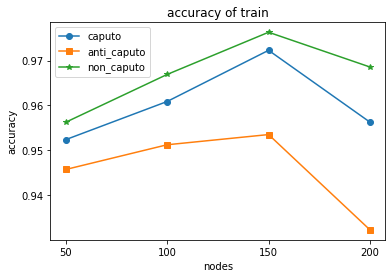

In [8]:
n0 = [plot_data[names[0]][i]['train'] for i in nodes]
n1 = [plot_data[names[1]][i]['train'] for i in nodes]
n2 = [plot_data[names[2]][i]['train'] for i in nodes]
plt.plot(nodes, n0, marker='o', label=names[0])
plt.plot(nodes, n1, marker='s', label=names[1])
plt.plot(nodes, n2, marker='*', label=names[2])
plt.xticks(nodes)
plt.title('accuracy of train')
plt.xlabel('nodes')
plt.ylabel('accuracy')
plt.legend()
plt.show()

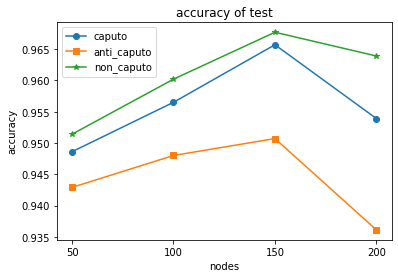

In [38]:
n0 = [plot_data[names[0]][i]['test'] for i in nodes]
n1 = [plot_data[names[1]][i]['test'] for i in nodes]
n2 = [plot_data[names[2]][i]['test'] for i in nodes]
plt.plot(nodes, n0, marker='o', label=names[0])
plt.plot(nodes, n1, marker='s', label=names[1])
plt.plot(nodes, n2, marker='*', label=names[2])
plt.xticks(nodes)
plt.title('accuracy of test')
plt.xlabel('nodes')
plt.ylabel('accuracy')
plt.legend()
plt.show()